<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [34]:
df = pd.read_csv("HR.csv")
target = df["left"]
df.drop("left", axis=1 , inplace = True)
df.insert(0, "left", target)

<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [28]:
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [30]:
df.isnull().sum()

left                     0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


In [31]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

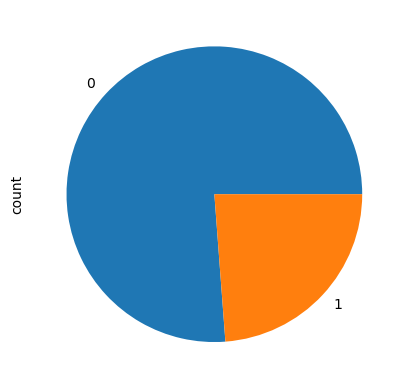

In [32]:
df['left'].value_counts().plot(kind='pie');

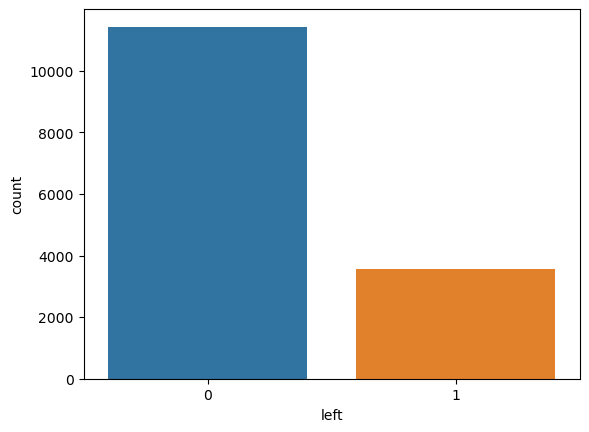

In [33]:
sns.countplot(data = df , x='left');

In [34]:
df['left'].value_counts()/df['left'].count()*100

left
0    76.191746
1    23.808254
Name: count, dtype: float64

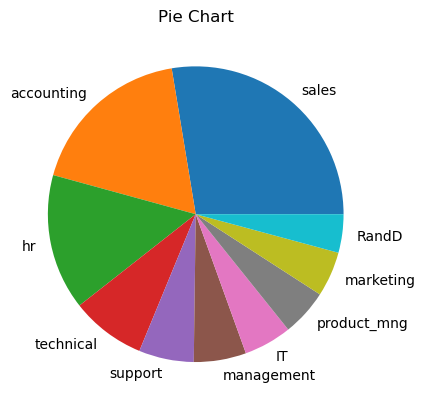

In [35]:
fig, ax = plt.subplots()
ax.pie(df['sales'].value_counts(), labels=df['sales'].unique())
ax.set_title('Pie Chart')
plt.show()

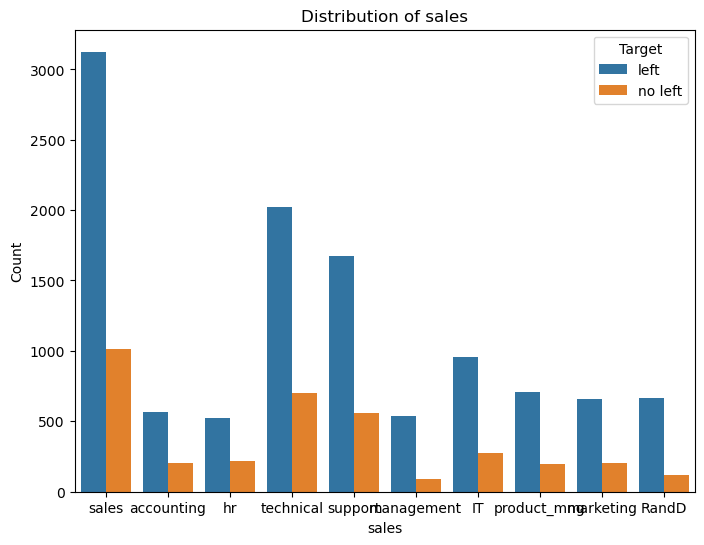

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sales', hue='left' )
plt.title('Distribution of sales')
plt.xlabel('sales')
plt.ylabel('Count')
plt.legend(title='Target', labels=['left', 'no left'])
plt.show()

In [37]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

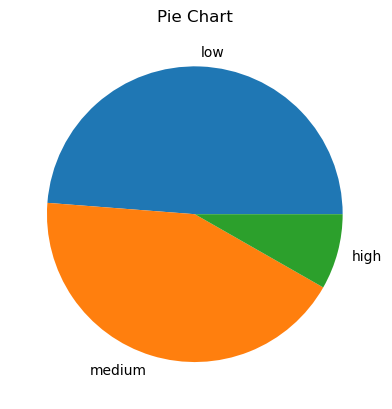

In [39]:
fig, ax = plt.subplots()
ax.pie(df['salary'].value_counts(), labels=df['salary'].unique())
ax.set_title('Pie Chart')
plt.show()

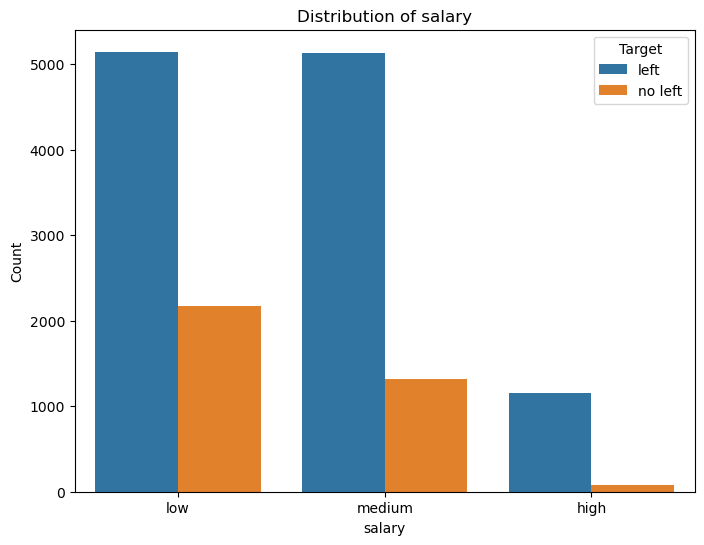

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', hue='left' )
plt.title('Distribution of salary')
plt.xlabel('salary')
plt.ylabel('Count')
plt.legend(title='Target', labels=['left', 'no left'])
plt.show()

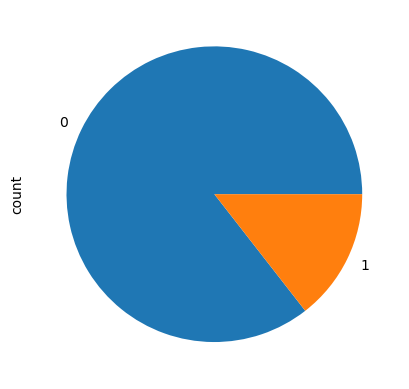

In [41]:
df['Work_accident'].value_counts().plot(kind='pie');

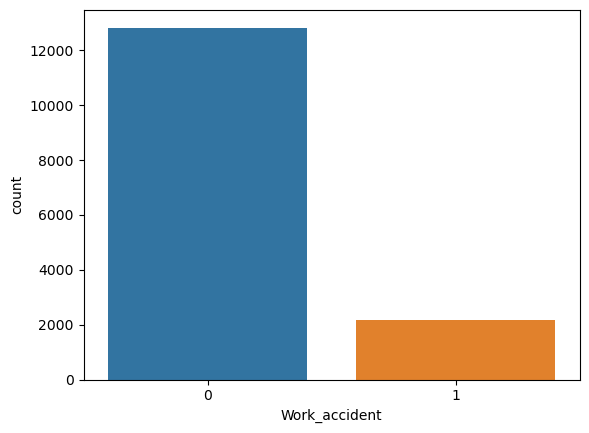

In [42]:
sns.countplot(data = df , x='Work_accident');

In [43]:
df['Work_accident'].value_counts()/df['Work_accident'].count()*100

Work_accident
0    85.539036
1    14.460964
Name: count, dtype: float64

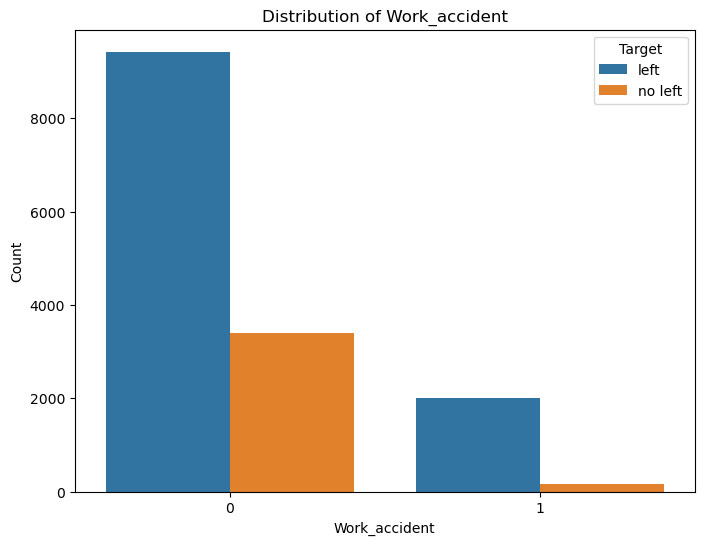

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Work_accident', hue='left' )
plt.title('Distribution of Work_accident')
plt.xlabel('Work_accident')
plt.ylabel('Count')
plt.legend(title='Target', labels=['left', 'no left'])
plt.show()


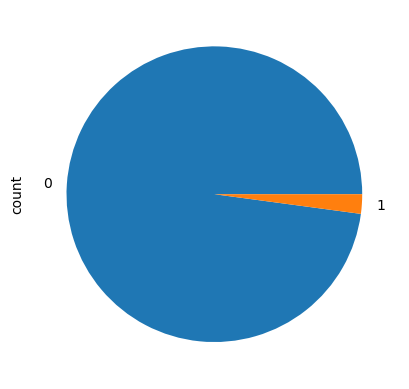

In [44]:
df['promotion_last_5years'].value_counts().plot(kind='pie');

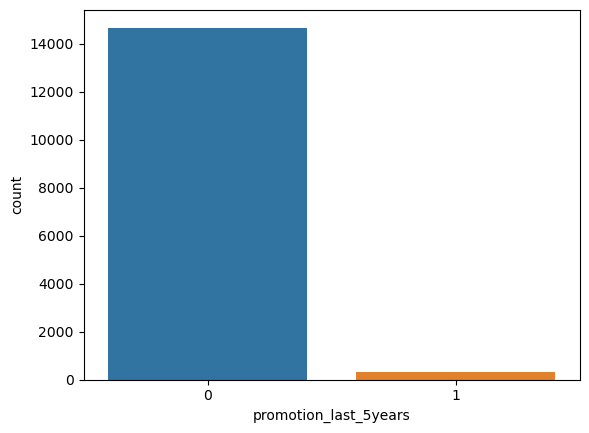

In [45]:
sns.countplot(data = df , x='promotion_last_5years');

In [46]:
df['promotion_last_5years'].value_counts()/df['promotion_last_5years'].count()*100

promotion_last_5years
0    97.873192
1     2.126808
Name: count, dtype: float64

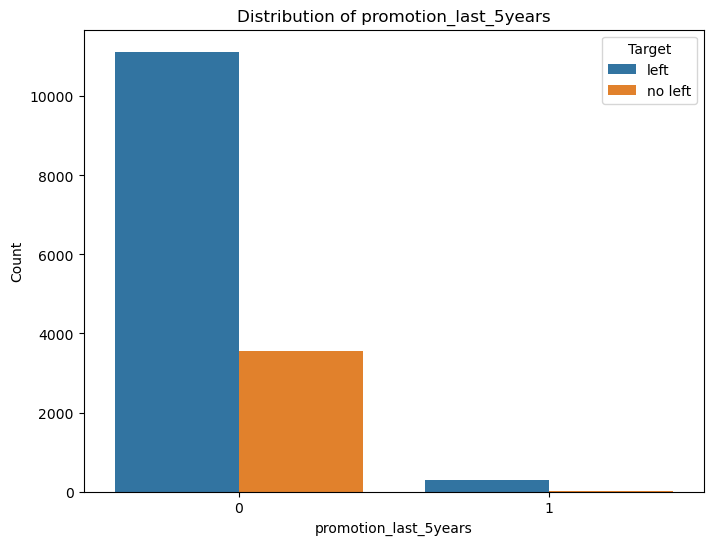

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='promotion_last_5years', hue='left' )
plt.title('Distribution of promotion_last_5years')
plt.xlabel('promotion_last_5years')
plt.ylabel('Count')
plt.legend(title='Target', labels=['left', 'no left'])
plt.show()


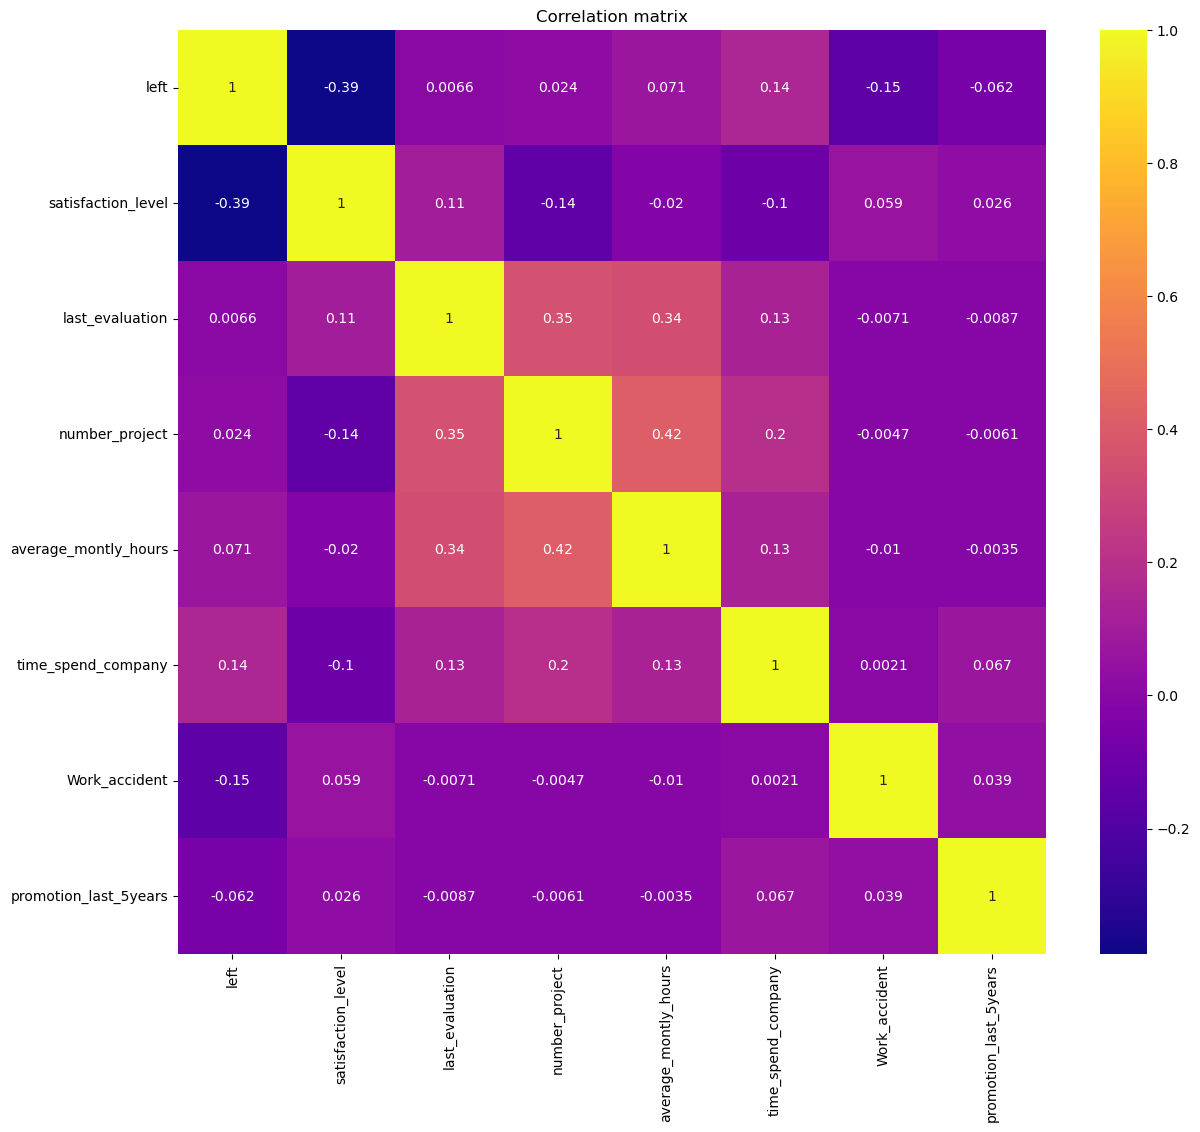

In [48]:
numeric_columns = df.select_dtypes(include=["int", "float"]).columns
df = df[numeric_columns]
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title(f'Correlation matrix')
plt.show()

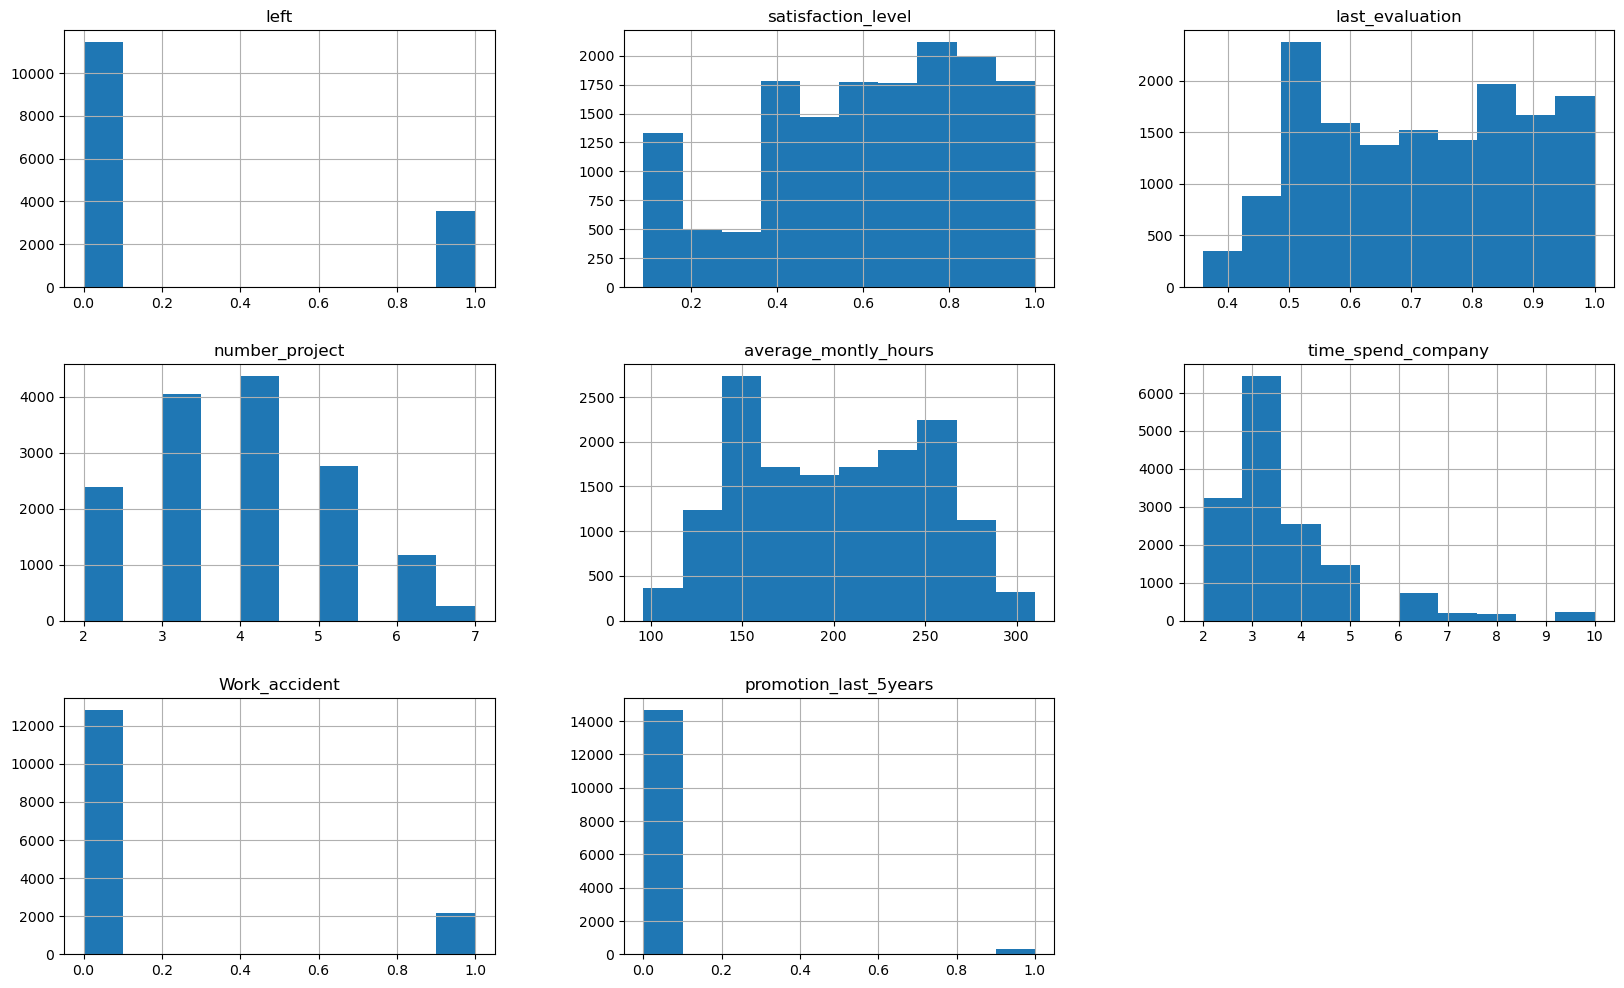

In [35]:
df.hist(figsize=(20, 12));

<a id="5"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧹 Preprocessing </p>

In [49]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company      1282
dtype: int64

In [ ]:
#Q1 = df[numerical_features].quantile(0.25)
#Q3 = df[numerical_features].quantile(0.75)
#IQR = Q3 - Q1
#threshold = 1.5
#outliers = (df[numerical_features] < (Q1 - threshold * IQR)) | (df[numerical_features] > (Q3 + threshold * IQR))
#df = df[~outliers.any(axis=1)]

# Outliers

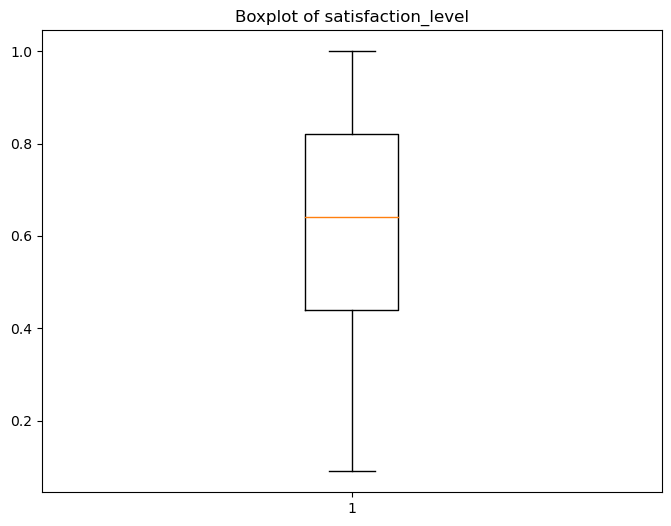

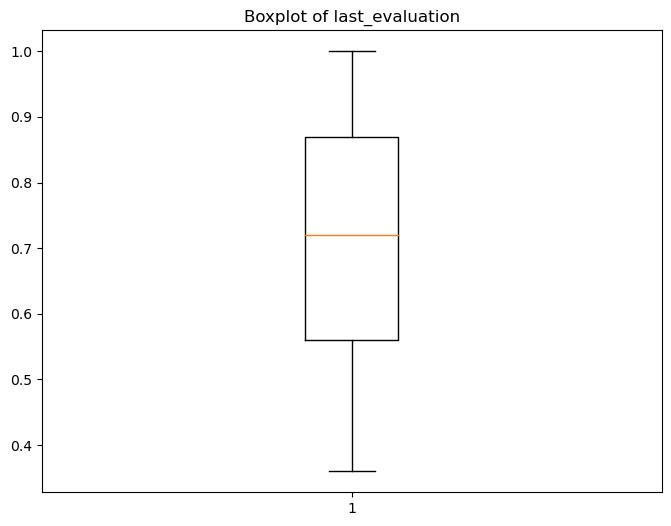

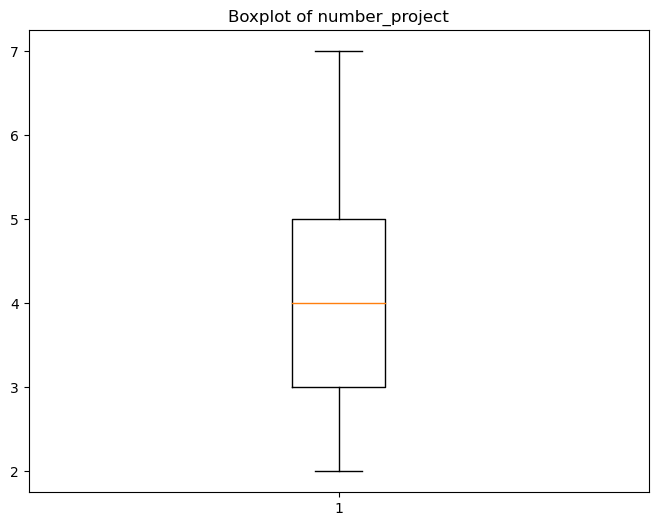

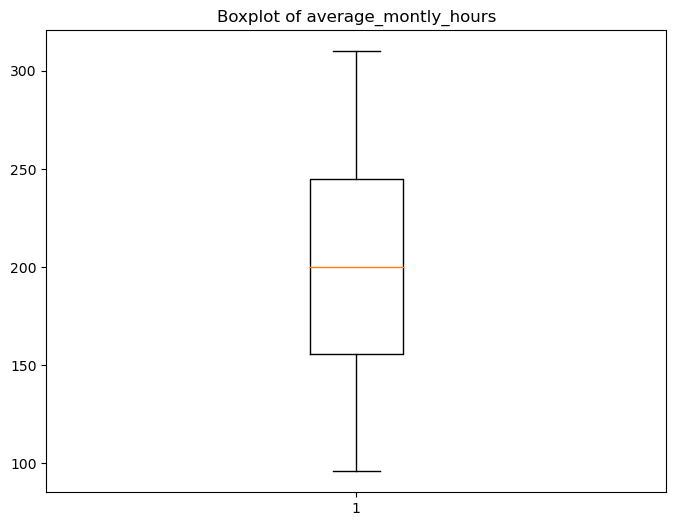

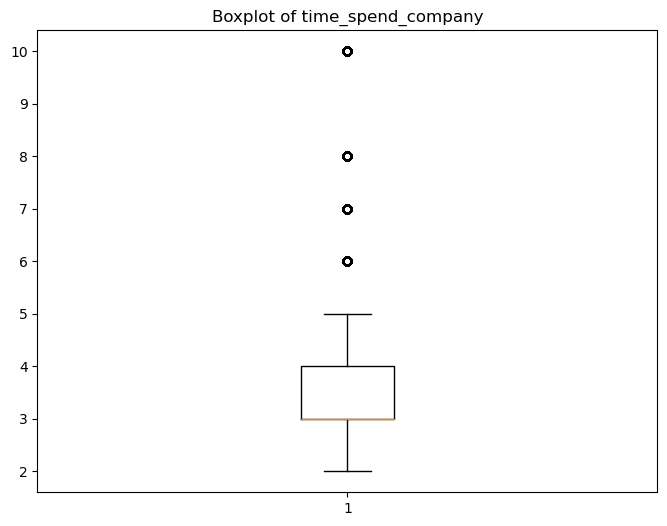

In [50]:
num_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# OHE

In [3]:
df = pd.get_dummies(df, columns=['sales', 'salary'], dtype=int)
df

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,1,0.38,0.53,2,157,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,2,151,3,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,1,0.37,0.48,2,160,3,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,1,0.37,0.53,2,143,3,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,1,0.11,0.96,6,280,4,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [4]:
X = df.drop(['left'] , axis=1)
y = df['left']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="8"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>


In [12]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [40]:
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [41]:
y_pred_dt = dt_model.predict(X_test)

In [10]:
from sklearn import metrics

In [43]:
metrics.mean_absolute_error(y_test, y_pred_dt)

0.01911111111111111

In [44]:
metrics.r2_score(y_test, y_pred_dt)

0.8944854036778517

In [45]:
df['left'].mean()

0.2380825388359224

In [46]:
df['left'].std()

0.425924099380363

## 🪄🪄 Grid Search Dt

In [47]:
from sklearn.model_selection import GridSearchCV 
model = DecisionTreeRegressor()

param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ["best", "random"],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_searchtree = GridSearchCV(model, param_grid, cv=5, verbose=10)
grid_searchtree.fit(X_train, y_train)
best_params = grid_searchtree.best_params_
best_model = grid_searchtree.best_estimator_
y_predtree = best_model.predict(X_test)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5; 1/360] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/360] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5; 1/360] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/360] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5; 1/360] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/360] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5; 1/360] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 1/360] E

In [54]:
print("Best Parameters:", best_params)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predtree))
print("R_2:", metrics.r2_score(y_test, y_predtree))


Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Mean Absolute Error: 0.03127797199293515
R_2: 0.9054845735019016


# 2️⃣ RandomForest 🌲🌴🪵

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()


In [56]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred_rf = rf_model.predict(X_test)

In [58]:
metrics.mean_absolute_error(y_test, y_pred_rf)

0.027004444444444446

In [59]:
metrics.r2_score(y_test, y_pred_rf)

0.9447599188491874

In [64]:
from sklearn.model_selection import GridSearchCV 
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_searchrf = GridSearchCV(rf_model, param_grid, cv=3, verbose=10)
grid_searchrf.fit(X_train, y_train)
best_params = grid_searchrf.best_params_
y_pred_rf = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("R_2:", metrics.r2_score(y_test, y_pred_rf))




Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3; 1/324] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 1/324] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.912 total time=   1.6s
[CV 2/3; 1/324] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 1/324] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.902 total time=   1.6s
[CV 3/3; 1/324] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 1/324] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   1.5s
[CV 1/3; 2/324] START criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2

## SVM

In [11]:
from sklearn.svm import SVR

svr_model = SVR()

In [12]:
svr_model.fit(X_train , y_train)

SVR()

In [13]:
y_pred_svr = svr_model.predict(X_test)

In [15]:
print(metrics.mean_absolute_error(y_test, y_pred_svr))

0.12810416196895


In [16]:
print(metrics.r2_score(y_test, y_pred_svr))

0.7410090969690789


In [31]:
from sklearn.model_selection import GridSearchCV 
params = {
    'C':range(1,30),
    'kernel':['linear', 'rbf'],
    'gamma': ['auto', 0.01, 0.1, 0.5]

}
grid_svr1 = GridSearchCV(svr_model, param_grid= params,  cv=3, verbose=10)
grid_svr1.fit(X_train, y_train)


Fitting 3 folds for each of 232 candidates, totalling 696 fits
[CV 1/3; 1/232] START C=1, gamma=auto, kernel=linear............................
[CV 1/3; 1/232] END C=1, gamma=auto, kernel=linear;, score=0.031 total time=  11.3s
[CV 2/3; 1/232] START C=1, gamma=auto, kernel=linear............................
[CV 2/3; 1/232] END C=1, gamma=auto, kernel=linear;, score=0.036 total time=  12.1s
[CV 3/3; 1/232] START C=1, gamma=auto, kernel=linear............................
[CV 3/3; 1/232] END C=1, gamma=auto, kernel=linear;, score=0.023 total time=  13.1s
[CV 1/3; 2/232] START C=1, gamma=auto, kernel=rbf...............................
[CV 1/3; 2/232] END C=1, gamma=auto, kernel=rbf;, score=0.726 total time=   4.9s
[CV 2/3; 2/232] START C=1, gamma=auto, kernel=rbf...............................
[CV 2/3; 2/232] END C=1, gamma=auto, kernel=rbf;, score=0.707 total time=   5.0s
[CV 3/3; 2/232] START C=1, gamma=auto, kernel=rbf...............................
[CV 3/3; 2/232] END C=1, gamma=auto, 

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': range(1, 30), 'gamma': ['auto', 0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             verbose=10)

In [32]:
best_params = grid_svr1.best_params_
best_model = grid_svr1.best_estimator_
y_pred_svr1 = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_svr1))
print("R_2:", metrics.r2_score(y_test, y_pred_svr1))

Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Absolute Error: 0.10157740538652597
R_2: 0.8475380489815564


# KNeighbors

In [27]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
params = {
    'n_neighbors':range(1,30),
    'weights':['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_KNN = GridSearchCV(knn, param_grid= params,  cv=3, verbose=10)
grid_KNN.fit(X_train, y_train)
best_params = grid_KNN.best_params_
best_model = grid_KNN.best_estimator_
y_pred_KNN = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_KNN))
print("R_2:", metrics.r2_score(y_test, y_pred_KNN))


Fitting 3 folds for each of 232 candidates, totalling 696 fits
[CV 1/3; 1/232] START algorithm=auto, n_neighbors=1, weights=uniform............
[CV 1/3; 1/232] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.750 total time=   0.1s
[CV 2/3; 1/232] START algorithm=auto, n_neighbors=1, weights=uniform............
[CV 2/3; 1/232] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.726 total time=   0.1s
[CV 3/3; 1/232] START algorithm=auto, n_neighbors=1, weights=uniform............
[CV 3/3; 1/232] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.748 total time=   0.1s
[CV 1/3; 2/232] START algorithm=auto, n_neighbors=1, weights=distance...........
[CV 1/3; 2/232] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.750 total time=   0.1s
[CV 2/3; 2/232] START algorithm=auto, n_neighbors=1, weights=distance...........
[CV 2/3; 2/232] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.726 total time=   0.1s
[CV 3/3; 2/232] START algorith

# xgboost

In [30]:
import xgboost as xgb
from xgboost import XGBRegressor
modelxg = XGBRegressor()
param_gridxg = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}
grid_xg = GridSearchCV(modelxg, param_grid= param_gridxg,  cv=3, verbose=10)
grid_xg.fit(X_train, y_train)
best_params = grid_xg.best_params_
best_model = grid_xg.best_estimator_
y_pred_xg = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_xg))
print("R_2:", metrics.r2_score(y_test, y_pred_xg))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3; 1/243] START gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 1/3; 1/243] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.633 total time=   0.8s
[CV 2/3; 1/243] START gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 2/3; 1/243] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.631 total time=   0.1s
[CV 3/3; 1/243] START gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 3/3; 1/243] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.642 total time=   0.2s
[CV 1/3; 2/243] START gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200
[CV 1/3; 2/243] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.778 total time=   0.4s
[CV 2